In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/OR - 7.csv')
y['Fault'] = 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [4]:
train = X_train.append(y_train)
train

,DE,FE,Fault
103476,0.062585,0.041091,0
96984,-0.075102,-0.013765,0
114732,-0.048190,-0.001233,0
10916,0.069260,0.028558,0
37646,0.040054,0.065335,0
...,...,...,...
45891,-0.289947,0.012122,1
117952,0.007716,-0.063485,1
42613,0.190049,0.368175,1
43567,0.285074,0.216755,1


In [5]:
test = X_test.append(y_test)
test

,DE,FE,Fault
121079,0.046313,0.054651,0
107924,-0.015855,0.061636,0
22678,-0.065297,0.122862,0
55190,-0.112652,0.066978,0
92048,0.023991,0.034105,0
...,...,...,...
103358,-0.544564,-0.450356,1
54412,1.083036,-0.001233,1
50632,-1.123239,-0.382145,1
89251,-0.068629,0.092660,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [7]:
train = train.values.reshape(-1, 1, 3)

test  = test.values.reshape(-1, 1, 3)

In [8]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [9]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4608      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 3)              99        
Total params: 13,027
Trainable params: 13,027
Non-trainable params: 0
__________________________________________________

In [10]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Train on 174463 samples, validate on 19385 samples
Epoch 1/100
174463/174463 [==============================] - 3s 17us/step - loss: 0.1321 - accuracy: 0.5392 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 2/100
174463/174463 [==============================] - 2s 10us/step - loss: 0.0166 - accuracy: 0.7961 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 3/100
174463/174463 [==============================] - 2s 10us/step - loss: 0.0130 - accuracy: 0.8229 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 4/100
174463/174463 [==============================] - 2s 11us/step - loss: 0.0115 - accuracy: 0.8353 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 5/100
174463/174463 [==============================] - 2s 11us/step - loss: 0.0103 - accuracy: 0.8482 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 6/100
174463/174463 [==============================] - 2s 11us/step - loss: 0.0092 - accuracy: 0.8416 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 7/100
174463/174463 [======================

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102725). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 4s 23us/step - loss: 0.0027 - accuracy: 0.9231 - val_loss: 3.9363e-04 - val_accuracy: 1.0000
Epoch 33/100
174463/174463 [==============================] - 5s 29us/step - loss: 0.0027 - accuracy: 0.9248 - val_loss: 4.2064e-04 - val_accuracy: 1.0000
Epoch 34/100
174463/174463 [==============================] - 5s 29us/step - loss: 0.0027 - accuracy: 0.9254 - val_loss: 3.9133e-04 - val_accuracy: 1.0000
Epoch 35/100
174463/174463 [==============================] - 5s 31us/step - loss: 0.0026 - accuracy: 0.9262 - val_loss: 4.3260e-04 - val_accuracy: 1.0000
Epoch 36/100
174463/174463 [==============================] - 6s 33us/step - loss: 0.0026 - accuracy: 0.9276 - val_loss: 3.7792e-04 - val_accuracy: 1.0000
Epoch 37/100
174463/174463 [==============================] - 5s 31us/step - loss: 0.0026 - accuracy: 0.9273 - val_loss: 4.3153e-04 - val_accuracy: 1.0000
Epoch 38/100
174463/174463 [==============================] - 5s 31us/step - loss: 

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.118684). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 28us/step - loss: 0.0025 - accuracy: 0.9282 - val_loss: 3.1424e-04 - val_accuracy: 1.0000
Epoch 59/100
  6000/174463 [>.............................] - ETA: 6s - loss: 0.0025 - accuracy: 0.9257 

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.136635). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 29us/step - loss: 0.0025 - accuracy: 0.9276 - val_loss: 3.2115e-04 - val_accuracy: 1.0000
Epoch 60/100
174463/174463 [==============================] - 5s 29us/step - loss: 0.0025 - accuracy: 0.9275 - val_loss: 2.8599e-04 - val_accuracy: 1.0000
Epoch 61/100
174463/174463 [==============================] - 5s 29us/step - loss: 0.0025 - accuracy: 0.9285 - val_loss: 3.0744e-04 - val_accuracy: 1.0000
Epoch 62/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0025 - accuracy: 0.9280 - val_loss: 2.6021e-04 - val_accuracy: 1.0000
Epoch 63/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0025 - accuracy: 0.9276 - val_loss: 2.8847e-04 - val_accuracy: 1.0000
Epoch 64/100
  8000/174463 [>.............................] - ETA: 6s - loss: 0.0026 - accuracy: 0.9351

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.130647). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 26us/step - loss: 0.0025 - accuracy: 0.9277 - val_loss: 3.2242e-04 - val_accuracy: 1.0000
Epoch 65/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0025 - accuracy: 0.9281 - val_loss: 2.8952e-04 - val_accuracy: 1.0000
Epoch 66/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0025 - accuracy: 0.9279 - val_loss: 2.8060e-04 - val_accuracy: 1.0000
Epoch 67/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0025 - accuracy: 0.9272 - val_loss: 3.0866e-04 - val_accuracy: 1.0000
Epoch 68/100
174463/174463 [==============================] - 4s 25us/step - loss: 0.0025 - accuracy: 0.9269 - val_loss: 2.7016e-04 - val_accuracy: 1.0000
Epoch 69/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0024 - accuracy: 0.9266 - val_loss: 2.8061e-04 - val_accuracy: 1.0000
Epoch 70/100
174463/174463 [==============================] - 4s 26us/step - loss: 

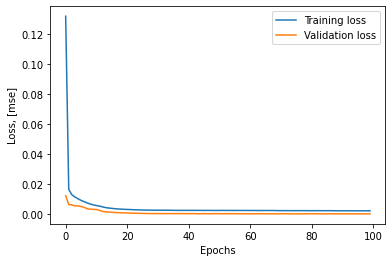

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.show()

In [12]:
pred_train = model.predict(train)

In [13]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

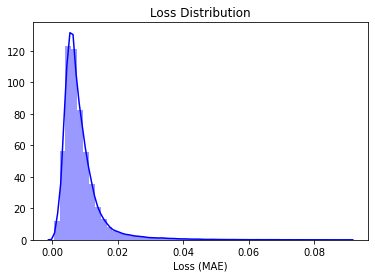

In [14]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [15]:
TH = 0.04
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [16]:
scored_train['Loss_mae'].mean()

0.008575753530156088

Text(0, 0.5, 'Loss (MAE)')

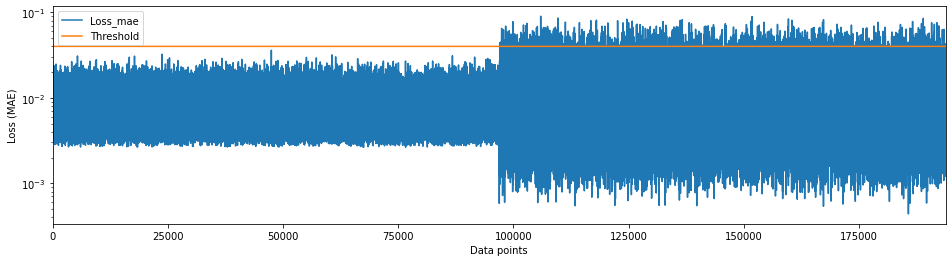

In [17]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [18]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.007037,0.04,False
1,0.009999,0.04,False
2,0.007453,0.04,False
3,0.006555,0.04,False
4,0.007312,0.04,False
...,...,...,...
193843,0.007083,0.04,False
193844,0.003361,0.04,False
193845,0.009228,0.04,False
193846,0.007179,0.04,False


In [19]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
97036   0.044271       0.04     True
97348   0.040694       0.04     True
97363   0.045245       0.04     True
97457   0.065095       0.04     True
97462   0.044601       0.04     True
...          ...        ...      ...
193544  0.045511       0.04     True
193611  0.041895       0.04     True
193615  0.041809       0.04     True
193645  0.043764       0.04     True
193676  0.040168       0.04     True

[1174 rows x 3 columns]
(1174, 3)


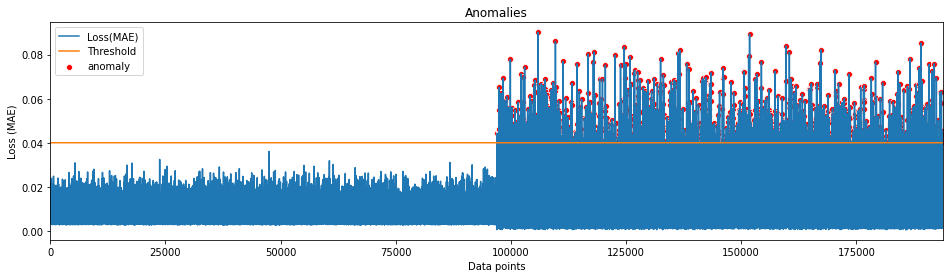

In [20]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [21]:
pred_test = model.predict(test)

In [22]:
score = model.evaluate(test,test)
score

48462/48462 [==============================] - 3s 64us/step


[0.00015754976387205905, 0.9404069185256958]

In [23]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

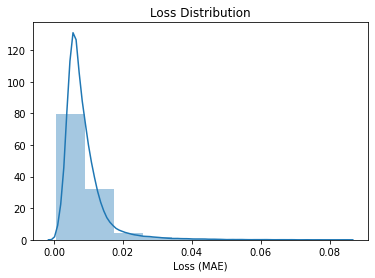

In [24]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [25]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.006976,0.04,False
1,0.006114,0.04,False
2,0.011140,0.04,False
3,0.010756,0.04,False
4,0.004167,0.04,False
...,...,...,...
48457,0.016722,0.04,False
48458,0.010733,0.04,False
48459,0.027051,0.04,False
48460,0.004181,0.04,False


In [26]:
scored_test['Loss_mae'].mean()

0.00856391851139514

Text(0, 0.5, 'Loss (MAE)')

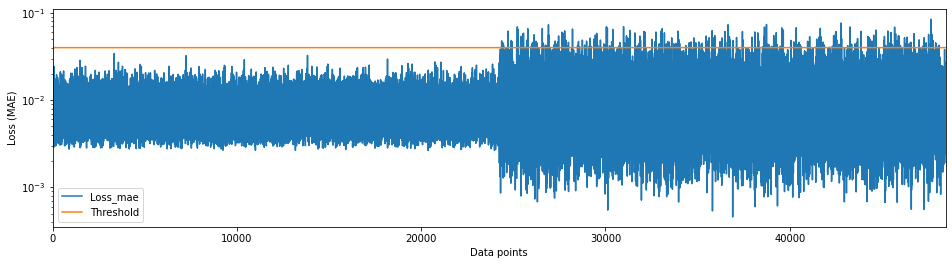

In [27]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [28]:
OR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(OR_anomalies)
print(OR_anomalies.shape)

       Loss_mae  Threshold  Anomaly
24364  0.047798       0.04     True
24386  0.042738       0.04     True
24430  0.045438       0.04     True
24466  0.042889       0.04     True
24721  0.062051       0.04     True
...         ...        ...      ...
47781  0.048233       0.04     True
47922  0.045416       0.04     True
47941  0.044012       0.04     True
47989  0.040894       0.04     True
48112  0.042569       0.04     True

[285 rows x 3 columns]
(285, 3)


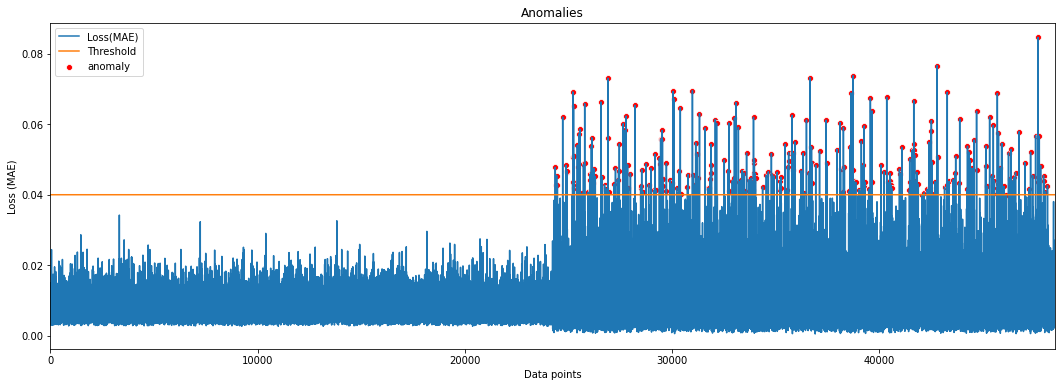

In [29]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=OR_anomalies.index , y=OR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [30]:
print(score[1])

0.9404069185256958


In [31]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 94.04%


In [32]:
print("Anomalies: {}".format(OR_anomalies['Anomaly'].count()))

Anomalies: 285


In [33]:
# Seperating Normal and Faulty dataset
x = scored_test['Anomaly'].count() / 2

In [34]:
normal_test = scored_test[scored_test.index < x]
normal_test

,Loss_mae,Threshold,Anomaly
0,0.006976,0.04,False
1,0.006114,0.04,False
2,0.011140,0.04,False
3,0.010756,0.04,False
4,0.004167,0.04,False
...,...,...,...
24226,0.009510,0.04,False
24227,0.011164,0.04,False
24228,0.008231,0.04,False
24229,0.008135,0.04,False


In [35]:
OR_test = scored_test[scored_test.index >= x]
OR_test

,Loss_mae,Threshold,Anomaly
24231,0.020214,0.04,False
24232,0.011436,0.04,False
24233,0.004302,0.04,False
24234,0.026877,0.04,False
24235,0.006046,0.04,False
...,...,...,...
48457,0.016722,0.04,False
48458,0.010733,0.04,False
48459,0.027051,0.04,False
48460,0.004181,0.04,False


In [36]:
TP = normal_test[normal_test['Anomaly'] == False]
TP = TP['Anomaly'].count()
print("True Positives: {}".format(TP))

FP = normal_test[normal_test['Anomaly'] == True]
FP = FP['Anomaly'].count()
print("False Positives: {}".format(FP))

TN = OR_test[OR_test['Anomaly'] == True]
TN = TN['Anomaly'].count()
print("True Negatives: {}".format(TN))

FN = OR_test[OR_test['Anomaly'] == False]
FN = FN['Anomaly'].count()
print("False Negatives: {}".format(FN))

True Positives: 24231
False Positives: 0
True Negatives: 285
False Negatives: 23946


In [37]:
Precision = TP / (TP + FP)
print("Precision: {:.2f}%".format(Precision*100))

Recall = TP / (TP + FN)
print("Recall: {:.3f}%".format(Recall*100))

F1Score = (2*Precision*Recall)/(Precision+Recall)
print("F1 Score: {:.2f}%".format(F1Score*100))

Accuracy = ( TP + TN ) / ( TP + TN + FN + FP )
print("Accuracy: {:.2f}%".format(Accuracy*100))

Precision: 100.00%
Recall: 50.296%
F1 Score: 66.93%
Accuracy: 50.59%
